<a href="https://colab.research.google.com/github/rodpmendes/DeepLearning/blob/main/activation_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

### Extracted from Hands-on ML with Scikit-Learn, Keras & TensorFlow.

In [1]:
# Common imports
import numpy as np
import os
import sys

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',  labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH      = os.path.join(PROJECT_ROOT_DIR, "figs")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# Activation functions

In [2]:
a = 0.7
l = 0.5

def sigmoid(v):
    return 1 / (1 + np.exp(-a*v))

def relu(v):
    return np.maximum(0, v)

def leak_relu(v):
    y = np.zeros(v.shape[0])
    for i,x in enumerate(v):
        if (x > 0):
            y[i]=l*x
        else:
            y[i] = l*a*x
    return(y)

def elu(v):
    y = np.zeros(v.shape[0])
    for i,x in enumerate(v):
        if (x > 0):
            y[i]=x
        else:
            y[i] = a*(np.exp(x)-1)
    return(y)

def selu(v):
    y = np.zeros(v.shape[0])
    for i,x in enumerate(v):
        if (x > 0):
            y[i]=l*x
        else:
            y[i] = l*a*(np.exp(x)-1)
    return(y)
    
def derivative(f, v, eps=0.000001):
    return (f(v + eps) - f(v - eps))/(2 * eps)


Saving figure activation_functions_plot


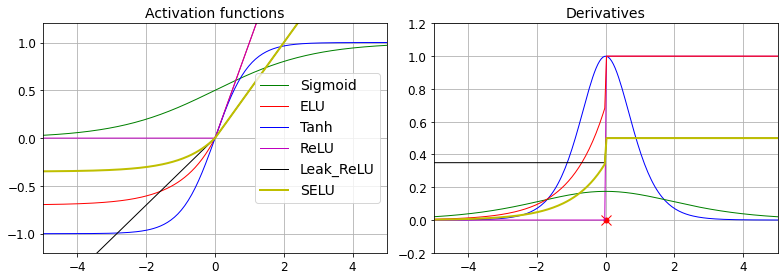

In [3]:
v = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(v, sigmoid(v), "g-", linewidth=1, label="Sigmoid")
plt.plot(v, elu(v), "r-", linewidth=1, label="ELU")
plt.plot(v, np.tanh(v), "b-", linewidth=1, label="Tanh")
plt.plot(v, relu(v), "m-", linewidth=1, label="ReLU")
plt.plot(v, leak_relu(v), "k-", linewidth=1, label="Leak_ReLU")
plt.plot(v, selu(v), "y-", linewidth=2, label="SELU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)

plt.plot(v, derivative(np.tanh,v), "b-", linewidth=1, label="Tanh")
plt.plot(v, derivative(relu,v), "m-", linewidth=1, label="ReLU")
plt.plot(v, derivative(sigmoid,v), "g-", linewidth=1, label="Sigmoid")
plt.plot(v, derivative(elu,v), "r-", linewidth=1, label="ELU")
plt.plot(v, derivative(leak_relu,v), "k-", linewidth=1, label="Leak_ReLU")
plt.plot(v, derivative(selu,v), "y-", linewidth=2, label="SELU")
plt.grid(True)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()